<a href="https://colab.research.google.com/github/zmy2338/Machine-Learning-AWS/blob/main/Another_copy_of_AWS_Part_II_Day_2_Lab_Notebook_%5BSOLUTIONS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day 2: Review II - Advanced Topics**
---

### **Description**
In this lab, you will practice implementing advanced ML techniques including: standardization and normalization; ordinal, one hot, and dummy variable encodings; GridSearchCV, K-Folds Cross Validation; and regularization.


### **Lab Structure**
**Part 1**: [Investigating Scaling](#p1)

**Part 2**: [Investigating Feature Encoding](#p2)


**Part 3**: [Optimizing K with GridSearchCV](#p3)

**Part 4**: [K-Folds Cross Validation](#p4)

**Part 5**: [[OPTIONAL] Investigating Regularization](#p5)



</br>


### **Goals**
By the end of this lab, you will be able to:
* Scale data using sklearn's `StandardScaler(...)` and `Normalizer(...)`.
* Encode categorical data using ordinal encoding, one-hot encoding, and dummy variable encoding.
* Evaluate a model's ability to handle unseen data by using K-Folds Cross Validation.

</br>

### **Cheat Sheets**
* [Advanced ML Techniques](https://docs.google.com/document/d/1IngTBMQSV65iybpEI-WAN1wIZtijxfO5dpM0TBwqQo8/edit?usp=sharing)

* [Logistic Regression](https://docs.google.com/document/d/1dAlAlRI1YAKa2Od08TJ9Z7JUysxcUucZXvNMVMvLA4w/edit?usp=share_link)

* [K-Nearest Neighbors](https://docs.google.com/document/d/1Z0Uk43jYmRPHgzIyg0s1YIU6hNIw43PFFtqbl8lbj64/edit?usp=share_link)


<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

<a name="p1"></a>

---
## **Part 1: Investigating Scaling**
---

In this section, we will investigate the role that no scaling versus standardization versus normalization can have on a model's performance. Specifically, we will use logistic regression to predict the type of crop that will grow the most successfully in a given set of conditions.

**Run the cell below to load and view the data frame we will be using this section.**

In [ ]:
url = 'https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/crop%20recommendation%20clean.csv'
df = pd.read_csv(url)

df.head()

,nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


#### **Problem #1.1**

Define the features and label given that we are attempting to predict the type of crop based on environmental conditions.

In [ ]:
features = # COMPLETE THIS LINE
label = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
features = df.drop(columns = 'crop')
label = df['crop']

#### **Problem #1.2**

Split the data into training and test sets such that 20% of the data is reserved for testing.

In [ ]:
X_train, X_test, y_train, y_test = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

#### **Problem #1.3**

Now, create a *standardized* version of the training and testing data using sklearn's `StandardScaler()`. We will use this to compare to the original training and test sets.

In [ ]:
std_scaler = StandardScaler()
X_train_std = std_scaler.# COMPLETE THIS LINE
X_test_std = std_scaler.# COMPLETE THIS LINE

SyntaxError: ignored

##### **Solution**

In [ ]:
std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

#### **Problem #1.4**

Now, create a *normalized* version of the training and testing data using sklearn's `Normalizer()`. We will use this to compare to the original training and test sets and to the standardized versions.

In [ ]:
norm_scaler = Normalizer()
X_train_norm = norm_scaler.# COMPLETE THIS LINE
X_test_norm = norm_scaler.# COMPLETE THIS LINE

SyntaxError: ignored

##### **Solution**

In [ ]:
norm_scaler = Normalizer()
X_train_norm = norm_scaler.fit_transform(X_train)
X_test_norm = norm_scaler.transform(X_test)

#### **Problem #1.5**

Before moving onto modeling, let's see if we can visually detect any differences between these types of scaling. Specifically, create three scatter plots as follows:
1. One comparing the original training data's 0th column to the *standardized* data's 0th column.
2. Another comparing the original training data's 0th column to the *normalized* data's 0th column.
3. A third one comparing the *standardized* training data's 0th column to the *normalized* data's 0th column.

##### **1. Create a scatter plot comparing the original training data's 0th column to the *standardized* data's 0th column.**

**Run the code below to accomplish this task.**

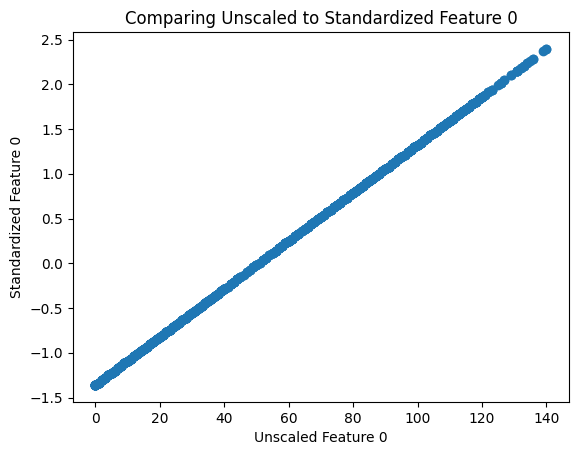

In [ ]:
plt.scatter(X_train.iloc[:, 0], X_train_std[:, 0])

plt.xlabel('Unscaled Feature 0')
plt.ylabel('Standardized Feature 0')
plt.title('Comparing Unscaled to Standardized Feature 0')

plt.show()

##### **2. Create a scatter plot comparing the original training data's 0th column to the *normalized* data's 0th column.**

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

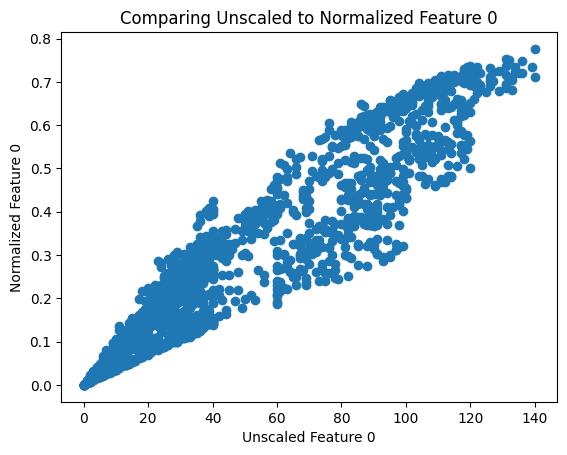

In [ ]:
plt.scatter(X_train.iloc[:, 0], X_train_norm[:, 0])

plt.xlabel('Unscaled Feature 0')
plt.ylabel('Normalized Feature 0')
plt.title('Comparing Unscaled to Normalized Feature 0')

plt.show()

##### **3. Create a scatter plot comparing the *standardized* data's 0th column to the *normalized* data's 0th column.**

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
plt.scatter(X_train_std[:, 0], X_train_norm[:, 0])

plt.xlabel('Standardized Feature 0')
plt.ylabel('Normalized Feature 0')
plt.title('Comparing Standardized to Normalized Feature 0')

plt.show()

NameError: ignored

#### **Problem #1.6**

**Discussion Questions**: Based on the visualizations above, does normalization or standardization seem to cause a larger change in the distribution of data? How might this affect a model's ability to make predictions?

##### **Solution**

Normalization definitely causes a bigger change visually. The standardized and unscaled features seem to be nearly identical in distribution, as evidenced by a nearly perfect straight line when comparing. On the other hand, the normalized and unscaled features exhibit a much more complex pattern.

In turn, this *may* mean that normalizing the data will make it harder for a model to predict the original distribution of outcomes.

#### **Problem #1.7**

Now it's time to model our data. Specifically, create three logistic regression models as follows:

1. Modeling with the original, unscaled training data and testing on the test set using a classifcation report and confusion matrix.

2. Modeling with the *standardized* training data and testing on the test set using a classifcation report and confusion matrix.

3. Modeling with the *normalized* training data and testing on the test set using a classifcation report and confusion matrix.

##### **1. Create a logistic regression model with the original, unscaled training data and test it on the test set using a classifcation report and confusion matrix.**

In [ ]:
model_unscaled = # COMPLETE LINE

model_unscaled.fit(# COMPLETE LINE


pred_unscaled = model_unscaled.# COMPLETE LINE

print(classification_report(y_test, pred_unscaled, labels = model_unscaled.classes_))

In [ ]:
cm = confusion_matrix(y_test, pred_unscaled, labels=model_unscaled.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_unscaled.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

##### **Solution**

In [ ]:
model_unscaled = LogisticRegression()

model_unscaled.fit(X_train, y_train)


pred_unscaled = model_unscaled.predict(X_test)

print(classification_report(y_test, pred_unscaled, labels = model_unscaled.classes_))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.95    

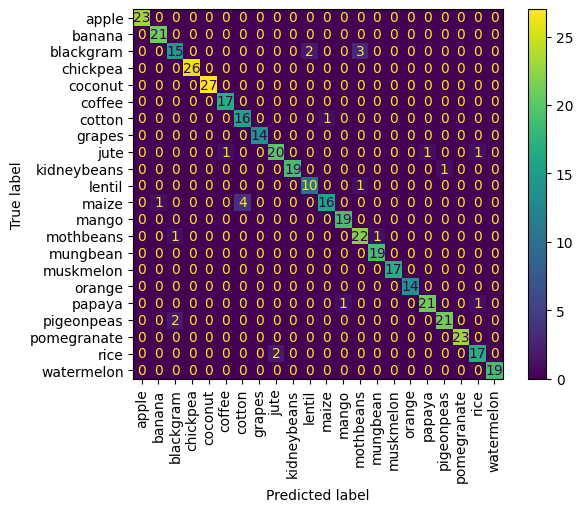

In [ ]:
cm = confusion_matrix(y_test, pred_unscaled, labels=model_unscaled.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_unscaled.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

##### **2. Create a logistic regression model with the *standardized* training data and test it on the test set using a classifcation report and confusion matrix.**

In [ ]:
model_std = # COMPLETE THIS LINE

model_std.fit(# COMPLETE THIS LINE

pred_std =  # COMPLETE THIS LINE

print(classification_report(# COMPLETE THIS LINE

In [ ]:
cm = confusion_matrix(# COMPLETE THIS LINE

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=# COMPLETE THIS LINE
disp.plot()

plt.xticks(rotation = 90)
plt.show()

##### **Solution**

In [ ]:
model_std = LogisticRegression()

model_std.fit(X_train_std, y_train)

pred_std = model_std.predict(X_test_std)

print(classification_report(y_test, pred_std, labels = model_std.classes_))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.83      0.87      0.85        23
 kidneybeans       0.95      0.95      0.95        20
      lentil       0.85      1.00      0.92        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.96    

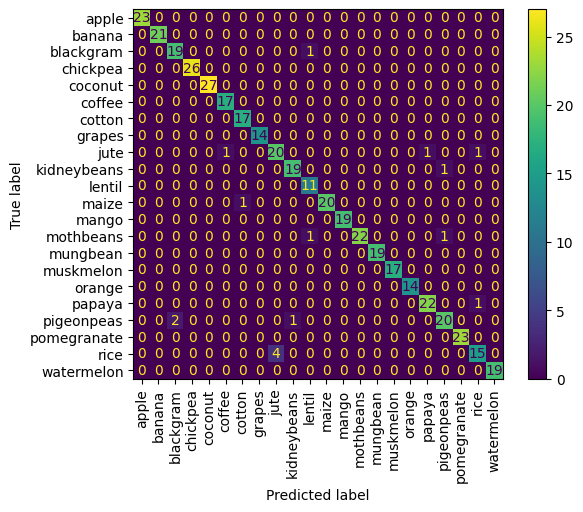

In [ ]:
cm = confusion_matrix(y_test, pred_std, labels=model_std.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_std.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

##### **3. Create a logistic regression model with the *normalized* training data and test it on the test set using a classifcation report and confusion matrix.**

In [ ]:
model_norm = # COMPLETE THIS LINE

# COMPLETE THIS CODE

In [ ]:
# COMPLETE THIS CODE

##### **Solution**

In [ ]:
model_norm = LogisticRegression()

model_norm.fit(X_train_norm, y_train)

pred_norm = model_norm.predict(X_test_norm)

print(classification_report(y_test, pred_norm, labels = model_norm.classes_))

              precision    recall  f1-score   support

       apple       1.00      0.83      0.90        23
      banana       0.95      1.00      0.98        21
   blackgram       0.70      0.70      0.70        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.85      0.92        27
      coffee       0.65      1.00      0.79        17
      cotton       0.61      1.00      0.76        17
      grapes       0.78      1.00      0.88        14
        jute       1.00      0.35      0.52        23
 kidneybeans       0.82      0.90      0.86        20
      lentil       0.52      1.00      0.69        11
       maize       1.00      0.38      0.55        21
       mango       0.83      1.00      0.90        19
   mothbeans       0.92      0.46      0.61        24
    mungbean       0.73      1.00      0.84        19
   muskmelon       0.94      1.00      0.97        17
      orange       0.82      1.00      0.90        14
      papaya       1.00    

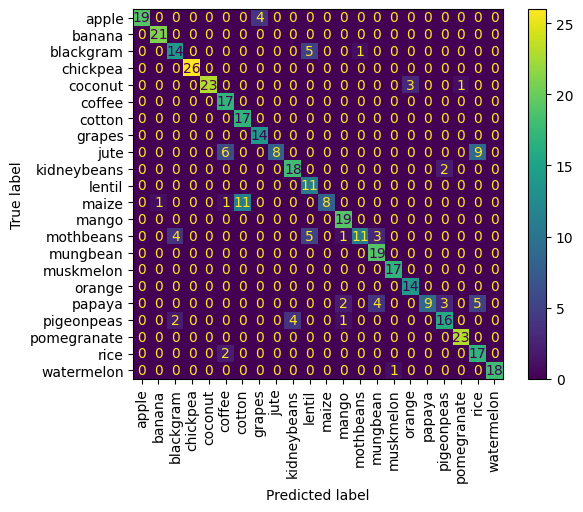

In [ ]:
cm = confusion_matrix(y_test, pred_norm, labels=model_norm.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_norm.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

#### **Reflection questions**
Answer the following questions:

1. Which of the three models had the highest performance?

2. Which of the three models had the lowest performance?

3. For the highest performing model, what two classes did it struggle with the most according to the f1-score.

4. Using the confusion matrix, can you explain what the model may be struggling with for these two classes?

5. What might this struggle to identify these two classes reveal about them?

##### **Solution**

1. The model trained on standardized data performed the most highly, just a little better than the model trained on unscaled data.

2. The model trained on normalized data performed significantly worse than the other two models.

3. The highest performing model struggled most with `rice` and `jute` according to the f1-scores.

4. The confusion matrix shows that while the model seems to do well overall with these crops, it does have a tendency to misclassify `rice` as `jute`.

5. While this may be an issue from an ML perspective (our model misclassifying points), it actually offers a potentially interesting insight. In particular, the model may be struggling to distinguish these crops because they need very similar conditions to grow well. From a farmer's perspective, this is extremely helpful to know because they can perhaps grow both without having to create or work with multiple land and environment types.

<a name="p2"></a>

---
## **Part 2: Investigating Feature Encoding**
---

In this section, we will investigate the role that different forms of encoding have on a model's performance. Specifically, we will use logistic regression to predict a high school student's final grade according to a discrete category of 0 - 20. This dataset contains many features, as described below:

* `school`: `GP` or `MS` are two different schools in Portugal where the data was collected.

* `sex`: `F` or `M` as the students identified.

* `age`: ranging from 15 - 22.

* `address`: `U` for urban and `R` for rural.

* `famsize`: `GT3` for greater than 3 family members and `LE3` for less than or equal to 3 family members.

* `Pstatus`: `T` if parents are living together and `A` if parents are living apart.

* `Medu`: Mother's education status. 'none' for no education, 'primary' for through 4th grade, 'middleschool' for through 9th grade, 'highschool' for through 12th grade, 'higher' for anything over 12th grade.

* `Fedu`: Father's education status. Same categories as `Medu`.

* `Mjob`: Mother's job.

* `Fjob`: Father's job.

* `reason`: Reason parents chose this school, which can be close to `home`, school `reputation`, `course` preference or `other`.

* `guardian`: Student's main guardian, which can be `father`, `mother`, or `other`.

* `traveltime`: How many minutes the student has to travel to get to school.

* `studytime`: How many hours the student studies per week.

* `failures`: How many classes the student has failed in the past.

* `schoolsup`: Whether the student is receiving any extra educational support.

* `famsup`: Whether the student is receiving any family educational support.

* `paid`: Whether the student is taking any extra paid courses within a course subject.

* `activities`: Whether the student is engaged in any extra-curricular activities.

* `nursery`: Whether the student attended nursery school.

* `higher`: Whether the student has expressed interested in taking higher education after graduating high school.

* `internet`: Whether the student has internet access at home.

* `romantic`: Whether the student has said they are engaged in a romantic relationship.

* `famrel`: How the student has rated the quality of their family relationships on a scale from 1 (very bad) to 5 (excellent).

* `freetime`: How the student has rated the amount of free time after school on a scale from 1 (very low) to 5 (very high).

* `goout`: How the student has rated how often they go out with friends on a scale from 1 (very low) to 5 (very high).

* `Dalc`: How the student has rated their weekday alcohol consumption on a scale from 1 (very low) to 5 (very high).

* `Walc`: How the student has rated their weekend alcohol consumption on a scale from 1 (very low) to 5 (very high).

* `health`: How the student's health ranks on a scale from 1 (very bady) to 5 (very good).

* `absences`: The number of days the student has been absent.

* `G1`: Grade in first period.

* `G2`: Grade in second period.

* `G3`: The overall grade of the student at the end of the year.

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/main/student-por.csv'
df = pd.read_csv(url)

edu_map = {0: 'none', 1: 'primary', 2: 'middleschool', 3: 'highschool', 4: 'higher'}
df['Medu'] = df['Medu'].map(edu_map)
df['Fedu'] = df['Fedu'].map(edu_map)

df['traveltime'] *= 15
df['studytime'] *= 2.5


df.head()
df.describe()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,23.528505,4.826656,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,11.229901,2.073774,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,15.000000,2.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,15.000000,2.500000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,15.000000,5.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,30.000000,5.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,60.000000,10.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


#### **Problem #2.1**

Just like with scaling, we must first split our training and test data *before* encoding to ensure there is no possible way for information to be exchanged between the training and test sets.

In particular, use `G3` as the label and split the data using the conventional 80/20 train/test split.

In [ ]:
features = # COMPLETE THIS LINE
label = # COMPLETE THIS LINE

X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
features = df.drop(columns = 'G3')
label = df['G3']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

#### **Problem #2.2**

To motivate why we need encodings, attempt training a logistic regression model on the raw training set below.

In [ ]:
model = LogisticRegression()

model.fit(# COMPLETE THIS LINE

##### **Solution**

**NOTE**: This code *should* run into an error. The point is that sklearn doesn't allow us to model using categorical variables in this form. They must be made numerical.

In [ ]:
model = LogisticRegression()

model.fit(X_train, y_train)

ValueError: ignored

#### **Problem #2.3**


Now, let's create 4 versions of the training and test sets to compare how different approaches to dealing with categorical variables work. Specifically,

1. Create a version of `X_train` and `X_test` where the unencoded categorical variables are just dropped.

2. Create a version of `X_train` and `X_test` where the unencoded categorical variables are encoded using ordinal encoding.

3. Create a version of `X_train` and `X_test` where the unencoded categorical variables are one hot encoded.

4. Create a version of `X_train` and `X_test` where the unencoded categorical variables are dummy variable encoded.

<br>

**Run the cell below to see the subset of all categorical (`object` type) columns in this data frame.**

In [ ]:
columns_to_encode = df.select_dtypes(include = object).columns

print(columns_to_encode)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


##### **1. Create a version of `X_train` and `X_test` where the unencoded categorical variables are just dropped.**

In [ ]:
X_train_drop = X_train.drop(# COMPLETE THIS LINE
X_test_drop = # COMPLETE THIS LINE

X_train_drop.head()

##### **Solution**

In [ ]:
X_train_drop = X_train.drop(columns = columns_to_encode)
X_test_drop = X_test.drop(columns = columns_to_encode)

X_train_drop.head()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
332,18,15,7.5,0,4,3,3,1,2,2,0,18,18
29,16,15,5.0,0,4,4,5,5,5,5,4,12,11
302,18,15,7.5,0,5,3,2,1,1,3,2,10,11
286,17,15,2.5,0,4,4,2,2,4,5,0,12,12
554,17,30,2.5,0,3,5,5,2,2,4,3,10,11


##### **2. Create a version of `X_train` and `X_test` where the unencoded categorical variables are encoded using ordinal encoding.**

**NOTE**: We must make copies of the original training and test sets using `.copy()` so that any modifications we make to these training and test sets do not modify the original ones.

In [ ]:
X_train_ord = X_train.copy()
X_test_ord = X_test.copy()


ord_enc = OrdinalEncoder()

X_train_ord[columns_to_encode] = ord_enc.fit_transform(# COMPLETE THIS LINE
X_test_ord[columns_to_encode] = ord_enc.transform(# COMPLETE THIS LINE

X_train_ord.head()

##### **Solution**

In [ ]:
X_train_ord = X_train.copy()
X_test_ord = X_test.copy()


ord_enc = OrdinalEncoder()

X_train_ord[columns_to_encode] = ord_enc.fit_transform(X_train[columns_to_encode])
X_test_ord[columns_to_encode] = ord_enc.transform(X_test[columns_to_encode])

X_train_ord.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
332,0.0,0.0,18,1.0,0.0,1.0,2.0,2.0,0.0,0.0,...,0.0,4,3,3,1,2,2,0,18,18
29,0.0,1.0,16,1.0,0.0,1.0,0.0,0.0,4.0,4.0,...,1.0,4,4,5,5,5,5,4,12,11
302,0.0,1.0,18,0.0,0.0,1.0,1.0,2.0,2.0,2.0,...,0.0,5,3,2,1,1,3,2,10,11
286,0.0,1.0,17,0.0,0.0,1.0,2.0,4.0,2.0,2.0,...,0.0,4,4,2,2,4,5,0,12,12
554,1.0,0.0,17,0.0,0.0,1.0,4.0,4.0,0.0,0.0,...,1.0,3,5,5,2,2,4,3,10,11


##### **3. Create a version of `X_train` and `X_test` where the unencoded categorical variables are one hot encoded.**

Since one hot encoding creates a new feature for every possible value of categorical features, the number of columns will grow dramatically. To account for this, we will break this process into two steps:

1. Fit the one hot encoder to the training data and determine the new features.

2. Transform (encode) the training and test sets accordingly.

In [ ]:
X_train_ohe = X_train_drop.copy()
X_test_ohe = X_test_drop.copy()


ohe_enc = OneHotEncoder(sparse_output = False)
ohe_enc.set_output(transform = 'pandas')

ohe_enc.fit(X_train[# COMPLETE THIS LINE

ohe_columns = ohe_enc.get_feature_names_out()
print(ohe_columns)

In [ ]:
X_train_ohe[ohe_columns] = ohe_enc.transform(X_train[# COMPLETE THIS LINE
X_test_ohe[# COMPLETE THIS LINE

X_train_ohe.head()

##### **Solution**

In [ ]:
X_train_ohe = X_train_drop.copy()
X_test_ohe = X_test_drop.copy()


ohe_enc = OneHotEncoder(sparse_output = False)
ohe_enc.set_output(transform = 'pandas')

ohe_enc.fit(X_train[columns_to_encode])

ohe_columns = ohe_enc.get_feature_names_out()
print(ohe_columns)

['school_GP' 'school_MS' 'sex_F' 'sex_M' 'address_R' 'address_U'
 'famsize_GT3' 'famsize_LE3' 'Pstatus_A' 'Pstatus_T' 'Medu_higher'
 'Medu_highschool' 'Medu_middleschool' 'Medu_none' 'Medu_primary'
 'Fedu_higher' 'Fedu_highschool' 'Fedu_middleschool' 'Fedu_none'
 'Fedu_primary' 'Mjob_at_home' 'Mjob_health' 'Mjob_other' 'Mjob_services'
 'Mjob_teacher' 'Fjob_at_home' 'Fjob_health' 'Fjob_other' 'Fjob_services'
 'Fjob_teacher' 'reason_course' 'reason_home' 'reason_other'
 'reason_reputation' 'guardian_father' 'guardian_mother' 'guardian_other'
 'schoolsup_no' 'schoolsup_yes' 'famsup_no' 'famsup_yes' 'paid_no'
 'paid_yes' 'activities_no' 'activities_yes' 'nursery_no' 'nursery_yes'
 'higher_no' 'higher_yes' 'internet_no' 'internet_yes' 'romantic_no'
 'romantic_yes']


In [ ]:
X_train_ohe[ohe_columns] = ohe_enc.transform(X_train[columns_to_encode])
X_test_ohe[ohe_columns] = ohe_enc.transform(X_test[columns_to_encode])

X_train_ohe.head()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
332,18,15,7.5,0,4,3,3,1,2,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
29,16,15,5.0,0,4,4,5,5,5,5,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
302,18,15,7.5,0,5,3,2,1,1,3,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
286,17,15,2.5,0,4,4,2,2,4,5,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
554,17,30,2.5,0,3,5,5,2,2,4,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


##### **4. Create a version of `X_train` and `X_test` where the unencoded categorical variables are dummy variable encoded.**

Since dummy variable encoding is very similar to one hot encoding, we will follow the same process as above:

1. Fit the one hot encoder to the training data and determine the new features.

2. Transform (encode) the training and test sets accordingly.

In [ ]:
X_train_ohe = X_train_drop.copy()
X_test_ohe = X_test_drop.copy()


ohe_enc = OneHotEncoder(sparse_output = False)
ohe_enc.set_output(transform = 'pandas')

ohe_enc.fit(X_train[# COMPLETE THIS LINE

ohe_columns = ohe_enc.get_feature_names_out()
print(ohe_columns)

In [ ]:
X_train_ohe[ohe_columns] = ohe_enc.transform(X_train[# COMPLETE THIS LINE
X_test_ohe[# COMPLETE THIS LINE

X_train_ohe.head()

##### **Solution**

In [ ]:
X_train_dv = X_train_drop.copy()
X_test_dv = X_test_drop.copy()


dv_enc = OneHotEncoder(sparse_output = False, drop = 'first')
dv_enc.set_output(transform = 'pandas')

dv_enc.fit(X_train[columns_to_encode])

dv_columns = dv_enc.get_feature_names_out()
print(dv_columns)

['school_MS' 'sex_M' 'address_U' 'famsize_LE3' 'Pstatus_T'
 'Medu_highschool' 'Medu_middleschool' 'Medu_none' 'Medu_primary'
 'Fedu_highschool' 'Fedu_middleschool' 'Fedu_none' 'Fedu_primary'
 'Mjob_health' 'Mjob_other' 'Mjob_services' 'Mjob_teacher' 'Fjob_health'
 'Fjob_other' 'Fjob_services' 'Fjob_teacher' 'reason_home' 'reason_other'
 'reason_reputation' 'guardian_mother' 'guardian_other' 'schoolsup_yes'
 'famsup_yes' 'paid_yes' 'activities_yes' 'nursery_yes' 'higher_yes'
 'internet_yes' 'romantic_yes']


In [ ]:
X_train_dv[dv_columns] = dv_enc.transform(X_train[columns_to_encode])
X_test_dv[dv_columns] = dv_enc.transform(X_test[columns_to_encode])

X_train_dv.head()

,age,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
332,18,15,7.5,0,4,3,3,1,2,2,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
29,16,15,5.0,0,4,4,5,5,5,5,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
302,18,15,7.5,0,5,3,2,1,1,3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
286,17,15,2.5,0,4,4,2,2,4,5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
554,17,30,2.5,0,3,5,5,2,2,4,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0


#### **Problem #2.4**

We now have 4 distinct datasets to train models on:
1. `X_train_drop` and `X_test_drop`
2. `X_train_ord` and `X_test_ord`
3. `X_train_ohe` and `X_test_ohe`
4. `X_train_dv` and `X_test_dv`

To understand the effect that these different approaches can have, fit a logistic regression model to each dataset and evaluate it using the classification report and confusion matrix.

##### **1. `X_train_drop` and `X_test_drop`**

In [ ]:
model_drop = LogisticRegression()

model_drop.fit(# COMPLETE THIS LINE

pred_drop = model_drop.predict(# COMPLETE THIS LINE

print(classification_report(y_test, pred_drop, labels = model_drop.classes_))

In [ ]:
cm = confusion_matrix(y_test, pred_drop, labels=model_drop.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_drop.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

##### **Solution**

In [ ]:
model_drop = LogisticRegression()

model_drop.fit(X_train_drop, y_train)

pred_drop = model_drop.predict(X_test_drop)

print(classification_report(y_test, pred_drop, labels = model_drop.classes_))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.75      0.43      0.55         7
           9       0.00      0.00      0.00         5
          10       0.32      0.53      0.40        17
          11       0.50      0.24      0.32        25
          12       0.31      0.25      0.28        16
          13       0.26      0.62      0.36        13
          14       0.00      0.00      0.00        12
          15       0.25      0.10      0.14        10
          16       0.29      0.56      0.38         9
          17       0.12      0.20      0.15         5
          18       0.00      0.00      0.00         7
          19       0.00      0.00      0.00         1

   micro avg       0.29   

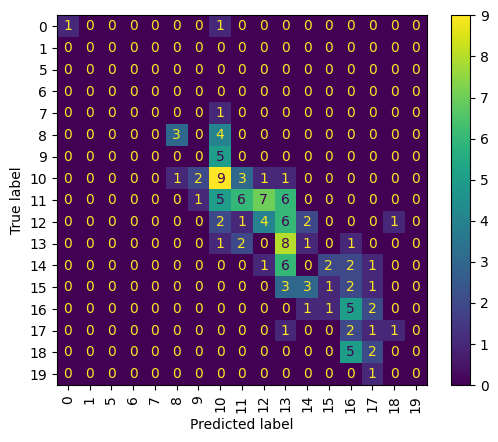

In [ ]:
cm = confusion_matrix(y_test, pred_drop, labels=model_drop.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_drop.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

##### **2. `X_train_ord` and `X_test_ord`**

##### **Solution**

In [ ]:
model_ord = LogisticRegression()

model_ord.fit(X_train_ord, y_train)

pred_ord = model_ord.predict(X_test_ord)

print(classification_report(y_test, pred_ord, labels = model_ord.classes_))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.33      0.29      0.31         7
           9       0.00      0.00      0.00         5
          10       0.36      0.59      0.44        17
          11       0.47      0.28      0.35        25
          12       0.14      0.12      0.13        16
          13       0.24      0.38      0.29        13
          14       0.00      0.00      0.00        12
          15       0.40      0.20      0.27        10
          16       0.27      0.44      0.33         9
          17       0.20      0.40      0.27         5
          18       0.67      0.29      0.40         7
          19       0.00      0.00      0.00         1

   micro avg       0.28   

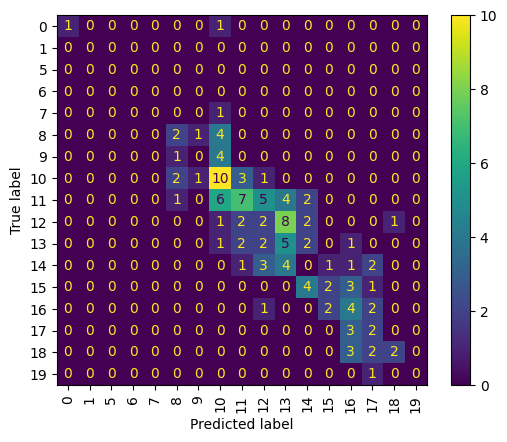

In [ ]:
cm = confusion_matrix(y_test, pred_ord, labels=model_ord.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_ord.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

##### **3. `X_train_ohe` and `X_test_ohe`**

##### **Solution**

In [ ]:
model_ohe = LogisticRegression()

model_ohe.fit(X_train_ohe, y_train)

pred_ohe = model_ohe.predict(X_test_ohe)

print(classification_report(y_test, pred_ohe, labels = model_ohe.classes_))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.57      0.57      0.57         7
           9       0.00      0.00      0.00         5
          10       0.27      0.35      0.31        17
          11       0.53      0.40      0.45        25
          12       0.33      0.31      0.32        16
          13       0.28      0.38      0.32        13
          14       0.00      0.00      0.00        12
          15       0.50      0.30      0.37        10
          16       0.21      0.33      0.26         9
          17       0.20      0.40      0.27         5
          18       0.33      0.14      0.20         7
          19       0.00      0.00      0.00         1

   micro avg       0.31   

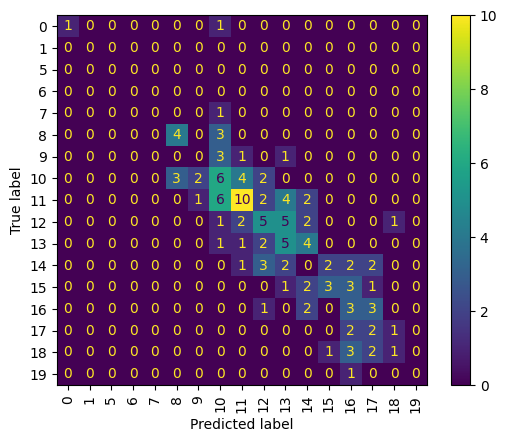

In [ ]:
cm = confusion_matrix(y_test, pred_ohe, labels=model_ohe.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_ohe.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

##### **4. `X_train_dv` and `X_test_dv`**

##### **Solution**

In [ ]:
model_dv = LogisticRegression()

model_dv.fit(X_train_dv, y_train)

pred_dv = model_dv.predict(X_test_dv)

print(classification_report(y_test, pred_dv, labels = model_dv.classes_))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.50      0.43      0.46         7
           9       0.00      0.00      0.00         5
          10       0.33      0.47      0.39        17
          11       0.47      0.32      0.38        25
          12       0.31      0.25      0.28        16
          13       0.19      0.31      0.24        13
          14       0.00      0.00      0.00        12
          15       0.38      0.30      0.33        10
          16       0.21      0.33      0.26         9
          17       0.12      0.20      0.15         5
          18       0.00      0.00      0.00         7
          19       0.00      0.00      0.00         1

   micro avg       0.27   

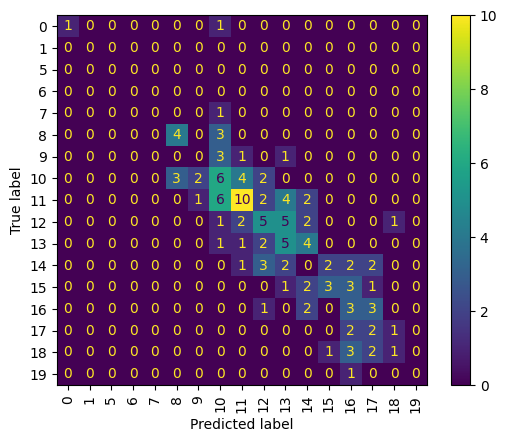

In [ ]:
cm = confusion_matrix(y_test, pred_ohe, labels=model_ohe.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_ohe.classes_)
disp.plot()

plt.xticks(rotation = 90)
plt.show()

### **Reflection questions**
Answer the following questions:

1. Which of the four models had the highest performance?

2. Which of the four models had the lowest performance?

3. How does the highest performing model compare to randomly guessing the grade (from 0 - 19)? **NOTE**: We can use the model's weighted avg f1-score as a comparison.

##### **Solution**

1. The model trained on one hot encoded data performed the best by a slim margin.

2. The model trained on dummy variable encoded data performed worst by a slim margin.

3. Randomly guessing out of 20 would give us a 5% chance of getting the correct answer. On the other hand, the best model achieved a 31% chance. Although this may seem like relatively low performing results, they are still 6 times better than if we had no model at all!

<a name="p3"></a>

---
## **Part 3: GridSearchCV**
---

#### **Problem #3.1**

Run the code below to create and determine the performance of your KNN model for many K values.

<br>


In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQgXRAZvBDRckm_Ll_LGXM7NTSHgBmoZA93QUDI6PBP37gMtq98ZNEE6PNf-WwUx1SGWT0diVo8JgGb/pub?gid=23834121&single=true&output=csv"
rainfall_df = pd.read_csv(url)

rainfall_df.head()

features = rainfall_df[["WindSpeed", "Temp"]]
label = rainfall_df["RainToday"]

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)
model_scaled = KNeighborsClassifier(n_neighbors = 5)

model.fit(X_train, y_train)

model_scaled.fit(X_train_scaled, y_train)

predictions = model.predict(X_test)
metrics.accuracy_score(y_test, predictions)

predictions_scaled = model_scaled.predict(X_test_scaled)
metrics.accuracy_score(y_test, predictions_scaled)


0.7385385610620465

[0.66942771 0.71762264 0.74259914 0.75414509 0.76078296 0.76549426
 0.76763192 0.77013516 0.7717384  0.77334162 0.77415729 0.77466359
 0.77540893 0.77563393 0.77550737 0.77581676 0.77615426 0.77618238
 0.77616832 0.77654803 0.77674492 0.7765621  0.77682929 0.77649177
 0.7767449 ]
{'n_neighbors': 45}


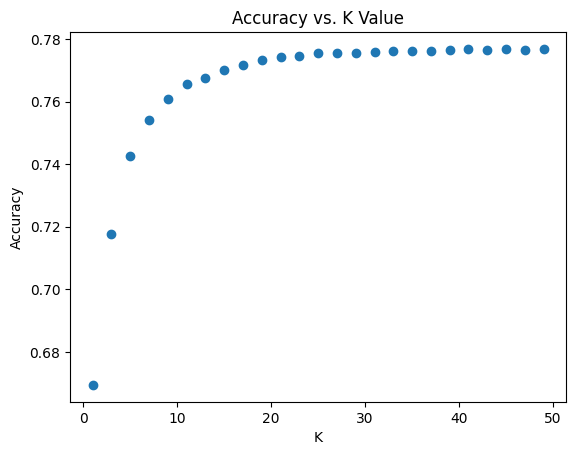

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining range of ks
ks = list(range(1, 50, 2))
param_grid = dict(n_neighbors=ks)


# creating grid searcher for KNN Classifier
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid)


# fitting the model for grid search
grid_search = grid.fit(X_train, y_train)


# looking at the scores for this range
print(grid_search.cv_results_['mean_test_score'])


# looking at the best k value
print(grid_search.best_params_)

# plotting results
plt.scatter(ks, grid_search.cv_results_['mean_test_score'])

plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

#### **Problem #3.2**

Using the best K value found above, create a KNN model. Then look at its accuracy. Compare to the previous results.

In [ ]:
model = KNeighborsClassifier(n_neighbors = #COMPLETE THIS CODE)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
metrics.accuracy_score(y_test, predictions)

##### **Solution**

In [ ]:
model = KNeighborsClassifier(n_neighbors = 45)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
metrics.accuracy_score(y_test, predictions)

0.7745401361309557

---
### **Try Problems #3.3 - 3.4 on your own!**
---

#### **Problem #3.3**

Now, run the code below to perform the same grid search but with the *scaled data*.

[0.66830255 0.71646949 0.74326014 0.75458108 0.76010796 0.76528328
 0.76777254 0.77038832 0.77190717 0.77280722 0.77415731 0.77483233
 0.775648   0.77592925 0.77576051 0.77622459 0.77605582 0.77664648
 0.77654803 0.77670274 0.77702619 0.77674492 0.77651991 0.77653396
 0.77642145]
{'n_neighbors': 41}


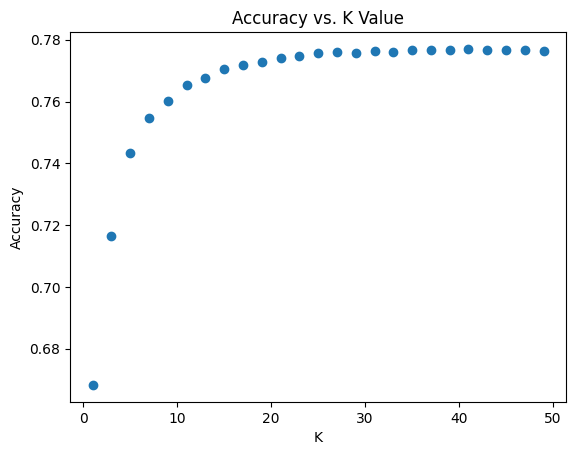

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining range of ks
ks = list(range(1, 50, 2))
param_grid = dict(n_neighbors=ks)


# creating grid searcher for KNN Classifier
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid)


# fitting the model for grid search
grid_search_scaled = grid.fit(X_train_scaled, y_train)


# looking at the scores for this range
print(grid_search_scaled.cv_results_['mean_test_score'])


# looking at the best k value
print(grid_search_scaled.best_params_)

# plotting results
plt.scatter(ks, grid_search_scaled.cv_results_['mean_test_score'])

plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

#### **Problem #3.4**

Using the best K value found above, create a KNN model. Then look at its accuracy. Compare to the previous results.

In [ ]:
model = KNeighborsClassifier(n_neighbors = #COMPLETE THIS CODE)
model.fit(X_train_scaled, y_train)

predictions_scaled = model.predict(X_test_scaled)
metrics.accuracy_score(y_test, predictions_scaled)

##### **Solution**

In [ ]:
model = KNeighborsClassifier(n_neighbors = 41)
model.fit(X_train_scaled, y_train)

predictions_scaled = model.predict(X_test_scaled)
metrics.accuracy_score(y_test, predictions_scaled)

0.7747651459751365

<a name="p4"></a>

---
## **Part 4: K-Folds**
---

In this section, we will explore how to use K-Folds to evaluate and compare models before deciding on the final model we will use. Only once we have selected our final model should we evaluate it on the test set.

In particular, we will use K-Folds Cross Validation to determine the best model for several datasets.

#### **Problem #4.1**

To start, let's train and evaluate a 5NN model on the Iris dataset as usual. This is *bad practice*, but will help motivate why we should use cross validation.

In [ ]:
iris = load_iris()

features = iris.data
label = iris.target

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = # COMPLETE THIS LINE

knn_5.fit(# COMPLETE THIS LINE

pred = knn_5.predict(# COMPLETE THIS LINE

print(classification_report(# COMPLETE THIS LINE

##### **Solution**

In [ ]:
iris = load_iris()

features = iris.data
label = iris.target

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

knn_5.fit(X_train, y_train)

pred = knn_5.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### **Problem #4.2**

Now, let's take the proper and more insightful approach: evaluating the model using K-Folds Cross Validation. Complete the code below to evaluate a 5NN model using 10-Folds Cross Validation.

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

scores_5 = cross_val_score(knn_5, X_train, y_train, cv = # COMPLETE THIS LINE
print("10-Folds CV Scores: " + str(scores_5.mean()) + " +/- " + str(scores_5.std()))

##### **Solution**

In [ ]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)

scores_5 = cross_val_score(knn_5, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_5.mean()) + " +/- " + str(scores_5.std()))

10-Folds CV Scores: 0.9333333333333333 +/- 0.07264831572567787


#### **Visualize the scores by running the cell below.**

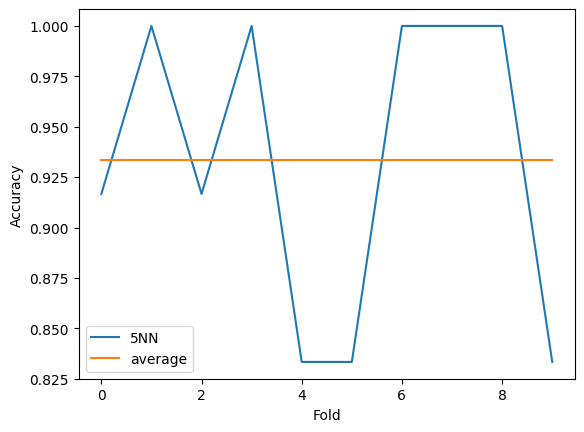

In [ ]:
plt.plot(scores_5, label = '5NN')
plt.plot([scores_5.mean() for i in range(10)], label = 'average')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### **Problem #4.3**

Now, use 10-Folds Cross Validation to evaluate and compare to the following models:
1. 1NN
2. 11NN (**NOTE**: $\sqrt{\text{length of training data}} \approx 11$)
3. 99NN
4. Logistic Regression

<br>

**NOTE**: There is code at the end that will visualize all of these results together.


#### **1. 1NN**

In [ ]:
knn_1 = KNeighborsClassifier(# COMPLETE THIS LINE

scores_1 = cross_val_score(# COMPLETE THIS LINE
print("10-Folds CV Scores: " + str(scores_1.mean()) + " +/- " + str(scores_1.std()))

##### **Solution**

In [ ]:
knn_1 = KNeighborsClassifier(n_neighbors = 1)

scores_1 = cross_val_score(knn_1, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_1.mean()) + " +/- " + str(scores_1.std()))

10-Folds CV Scores: 0.9416666666666667 +/- 0.08374896350934075


#### **2. 11NN (**NOTE**: $\sqrt{\text{length of training data}} \approx 11$)**

In [ ]:
knn_11 = # COMPLETE THIS LINE

# COMPLETE THIS CODE

##### **Solution**

In [ ]:
knn_11 = KNeighborsClassifier(n_neighbors = 11)

scores_11 = cross_val_score(knn_11, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_11.mean()) + " +/- " + str(scores_11.std()))

10-Folds CV Scores: 0.9583333333333333 +/- 0.05590169943749474


#### **3. 99NN**

In [ ]:
knn_99 = # COMPLETE THIS LINE

# COMPLETE THIS CODE

##### **Solution**

In [ ]:
knn_99 = KNeighborsClassifier(n_neighbors = 99)

scores_99 = cross_val_score(knn_99, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_99.mean()) + " +/- " + str(scores_99.std()))

10-Folds CV Scores: 0.4 +/- 0.08975274678557509


#### **4. Logistic Regression**

In [ ]:
log = # COMPLETE THIS LINE

# COMPLETE THIS CODE

##### **Solution**

In [ ]:
log = LogisticRegression()

scores_log = cross_val_score(log, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_log.mean()) + " +/- " + str(scores_log.std()))

10-Folds CV Scores: 0.9333333333333332 +/- 0.10408329997330665


#### **Visualize the scores by running the cell below.**

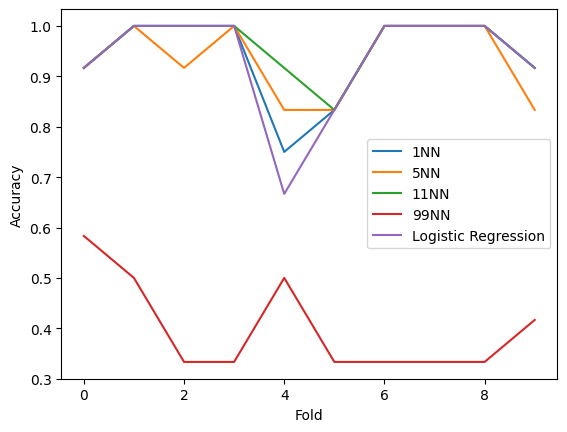

In [ ]:
plt.plot(scores_1, label = '1NN')
plt.plot(scores_5, label = '5NN')
plt.plot(scores_11, label = '11NN')
plt.plot(scores_99, label = '99NN')
plt.plot(scores_log, label = 'Logistic Regression')

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### **Problem #4.4**

Assuming we do not plan to try out any other models, we can safely train our final model and evaluate it on the test set. Consider the average, standard deviation, and individual scores we visualized to pick one of the models from above and:
* Train it on the entire training set.
* Evaluate it on the test set with a classification report.


##### **Solution**

In [ ]:
model = KNeighborsClassifier(n_neighbors = 11)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### **Reflection questions**
Answer the following questions:

1. Which of the five models had the highest performance during cross validation?

2. Which of the five models had the lowest performance during cross validation?

3. How do the top performing model's cross validation metrics compare to the test metrics? In other words, how does this model perform in Problem #3.3 versus #3.4?

#### **Solution**

1. The 11NN model had the highest performance during cross validation.

2. The 99NN mode had the worst performance by far during the cross validation.

3. The 11NN model had an accuracy of roughly 0.9583 +/- 0.056 during cross validation, but 1.0 accuracy (and all other metrics) during testing. This is a great example of how much more insight cross validation can provide. It is often a much needed reality check and a number that will gain much more respect from the community than just the test metrics.

<a name="p5"></a>

---
## **Part 5: Regularization**
---

In this section, we will see how regularization can affect model performance. Regularization attempts to reduce overfitting by trying to make the coefficients as small as possible. This is done through a "penalty term" that needs to be made as small as possible during training in addition to finding a good fit for the training data.

We will use the techniques we have learned throughout this notebook to properly compare logistic regression models using three of the regularization or `penalty` options provided by sklearn:

* `None`: no penalty is added.
* `'l2'` (Ridge): add a L2 penalty term and it is the default choice. (This equals $\text{coefficient}_1^2 + \text{coefficient}_2^2 + \text{coefficient}_3^2 + ...$.)
* `'l1'` (Lasso): add a L1 penalty term. (This equals $|\text{coefficient}_1| + |\text{coefficient}_2| + |\text{coefficient}_3| + ...$.)



<br>

In particular, we will attempt to find the best possible model for detecting breast cancer based on the [UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)). The dataset contains mammography exam results and whether or not cancer was detected.

In [ ]:
cancer_dataset = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
cancer_df['TARGET'] = cancer_dataset.target

features = cancer_df[["mean radius","mean texture"]].values
label = cancer_df[["TARGET"]].values

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Problem #5.1**

Let's use 10-Folds Cross Validation to evaluate and compare to the following models:
1. Logistic Regression with `penalty = None`.
2. Logistic Regression with `penalty = 'l2'`.
3. Logistic Regression with `penalty = 'l1'`.

<br>

**NOTE**: There is code at the end that will visualize all of these results together.


##### **1. Logistic Regression with `penalty = None`.**

**NOTE**: There are different "solvers" available to find the best logistic function. We will specify `solver = 'saga'` since this one works with all penalties available. You can read more in the [sklearn Logistic Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) if you would like.

<br>

**Run the code below to accomplish this task.**

In [ ]:
model_none = LogisticRegression(solver = 'saga', penalty = None)

scores_none = cross_val_score(model_none, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_none.mean()) + " +/- " + str(scores_none.std()))

10-Folds CV Scores: 0.8833816425120773 +/- 0.04882344629880826


##### **2. Logistic Regression with `penalty = 'l2'`.**

**NOTE**: This is the default.

In [ ]:
model_l2 = # COMPLETE THIS CODE

##### **Solution**

In [ ]:
model_l2 = LogisticRegression(solver = 'saga', penalty = 'l2')

scores_l2 = cross_val_score(model_l2, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_l2.mean()) + " +/- " + str(scores_l2.std()))

10-Folds CV Scores: 0.8855555555555557 +/- 0.05147566853811395


##### **3. Logistic Regression with `penalty = 'l1'`.**

In [ ]:
model_l1 = # COMPLETE THIS LINE

# COMPLETE THIS CODE

##### **Solution**

In [ ]:
model_l1 = LogisticRegression(solver = 'saga', penalty = 'l1')

scores_l1 = cross_val_score(model_l1, X_train, y_train, cv=10)
print("10-Folds CV Scores: " + str(scores_l1.mean()) + " +/- " + str(scores_l1.std()))

10-Folds CV Scores: 0.8833816425120773 +/- 0.04882344629880826


##### **Visualize the scores by running the cell below.**

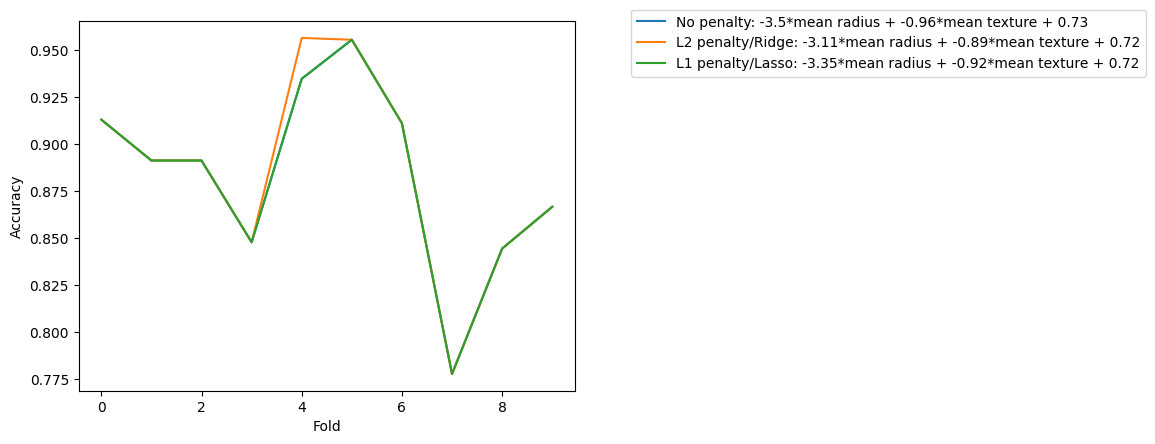

In [ ]:
model_none = LogisticRegression(solver = 'saga', penalty = None)
model_l2 = LogisticRegression(solver = 'saga', penalty = 'l2')
model_l1 = LogisticRegression(solver = 'saga', penalty = 'l1')

model_none.fit(X_train, y_train)
model_l2.fit(X_train, y_train)
model_l1.fit(X_train, y_train)

model_none_params = [str(round(model_none.coef_[0][0], 2)), str(round(model_none.coef_[0][1], 2)), str(round(model_none.intercept_[0], 2))]
model_l2_params = [str(round(model_l2.coef_[0][0], 2)), str(round(model_l2.coef_[0][1], 2)), str(round(model_l2.intercept_[0], 2))]
model_l1_params = [str(round(model_l1.coef_[0][0], 2)), str(round(model_l1.coef_[0][1], 2)), str(round(model_l1.intercept_[0], 2))]

plt.plot(scores_none, label = 'No penalty: ' + model_none_params[0] + '*mean radius + ' + model_none_params[1] + '*mean texture + ' + model_none_params[2])
plt.plot(scores_l2, label = 'L2 penalty/Ridge: ' + model_l2_params[0] + '*mean radius + ' + model_l2_params[1] + '*mean texture + ' + model_l2_params[2])
plt.plot(scores_l1, label = 'L1 penalty/Lasso: ' + model_l1_params[0] + '*mean radius + ' + model_l1_params[1] + '*mean texture + ' + model_l1_params[2])

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.show()

#### **Problem #5.2**

Consider the average, standard deviation, and individual scores we visualized to pick one of the models from above and evaluate it on the test set with a classification report.

##### **Solution**

**NOTE**: No penalty and L2 were very close, so really either would be fine here. However, L2 is generally preferable (which is why it's the default).

In [ ]:
pred = model_l2.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



#### **Reflection questions**
Answer the following questions:

1. Which of the three models had the highest performance during cross validation?

2. Which of the three models had the lowest performance during cross validation?

3. How do the top performing model's cross validation metrics compare to the test metrics?

##### **Solution**

1. The L2 and no penalty models performed nearly identical, so it's hard to say. On the one hand, L2 is considered the go to choice because smaller coefficients are preferable. However, the no penalty model's cross validation metrics had a smaller standard deviation, meaning that they were slightly more consistent.

2. The L1 penalty model performed slightly worse than the others.

3. The 11NN model had an accuracy of roughly 0.887 +/- 0.071 during cross validation, but .90 accuracy during testing. This should give some confidence that the model will perform at around this level, but generally it'd be safer to consider it as roughly 88% rather than 90%.

---
#End of Notebook

© 2023 The Coding School, All rights reserved